## **2.2 Google Colab - Simple_ImgProcessing**

Los ejercicios que deben agregarse a este proyecto serán las siguientes:


1.   Las transformaciones pixel a pixel son sumamente utilizadas
para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

2.   Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

3.   Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

4.   Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.




# **Names and IDs of team members:**

**Nombre Matrícula**

Félix Daniel Reyes López A01794458

Dante Cesar Cervantes Gutierrez A01794585

Ruben Guerrero del Fierro A01793005

Juan Manuel Carballo Montaño A01166758

# **Importing libraries**

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# **Loading images from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/ComputerVision/Activities/2.2"
os.chdir(DIR)

# **Ejercicio 1A. Ecualizacion de Histogramas**

**Explicacion:**

Source https://code.tutsplus.com/histogram-equalization-in-python--cms-30202t

**img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)**.

 Esta linea de codigo conviete la imagen de formato BGR to YUV.

Esta conversion es necesaria porque **formato BGR** no es compatible con la funcion de ecualizacion de imagenes.

  **Formato YUV** es compatible con la funcion ecualizacion de imagenes.
  
**img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])**

Una vez que la imagen esta en el formato correcto aplicamos la tecnica ecualizacion de imagenes.

**img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)**
Ya aplicada la tecnica ecualizacion de imagenes a la imagen es necesario regresar al formato original (BGR).

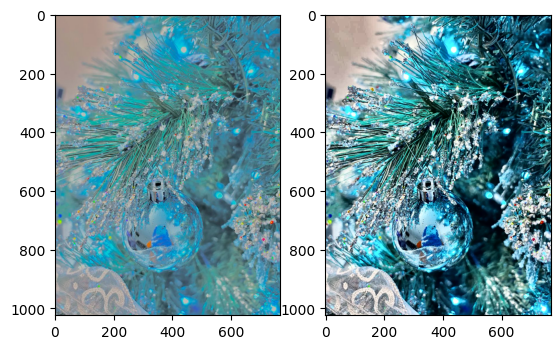

In [4]:
# code exercise 1A
img = cv2.imread('Images/pine.jpg')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
#cv2.imwrite('Images/equaHist.jpg',hist_equalization_result)
#result = cv2.imread('Images/equaHist.jpg')
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(hist_equalization_result)

# **Ejercicio 1B. Ajuste de contraste**

**Explicacion**

Fuente: https://likegeeks.com/python-image-processing/

La funcion cv2.addWeighted puede ser utilizada para ajustar contraste y brillo. En este caso aplicaremos primero contraste (ejercicio 1 B) y despues brillo (ejercicio 1C).

Para ajustar contraste es necesario trabajar sobre los primeros 2 valores de entrada.

cv2.addWeighted(**source_img1**, **alpha1**, source_img2, alpha2, beta)


*   **source_img1**.- imagen sobre la que se trabajara el contraste
*   **alpha1**.- contraste que se le aplicara a la imagen
*   source_img2.- se crea un arreglo de la misma forma de la imagen sobre la que se trabaja pero con valores 0.
*   alpha2.- no se utiliza para este caso
*   beta.- no se utiliza para este caso


cv2.addWeighted(**img**, **2**, np.zeros(img.shape, img.dtype), 0, 0)


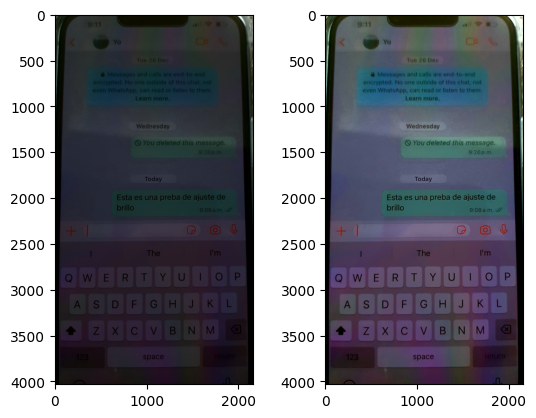

In [5]:
# code exercise 1B
img = cv2.imread("Images/cell.jpg")
contrast_img = cv2.addWeighted(img, 2, np.zeros(img.shape, img.dtype), 0, 0)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(contrast_img)

# **Ejercicio 1C. Ajuste de brillo**

**Explicacion**

Fuente: https://likegeeks.com/python-image-processing/

La funcion cv2.addWeighted puede ser utilizada para ajustar contraste y brillo. En este caso aplicaremos primero contraste (ejercicio 1B) y despues brillo (ejercicio 1C).

Para ajustar contraste es necesario trabajar sobre los primeros 2 valores de entrada.

cv2.addWeighted(source_img1, alpha1, **source_img2**, **alpha2**, beta)


*   source_img1.- se crea un arreglo de la misma forma de la imagen sobre la que se trabaja pero con valores 0.
*   alpha1.- no se utiliza para este caso
*   **source_img2**.- se utiliza la imagen generada en el ejercicio 1B a la que se le ajusto el contraste.
*   **alpha2**.- se ajusta el brillo de la imagen
*   beta.- no se utiliza para este caso


cv2.addWeighted(np.zeros(img.shape, img.dtype), 0,**contrast_img**, **2**, 0)

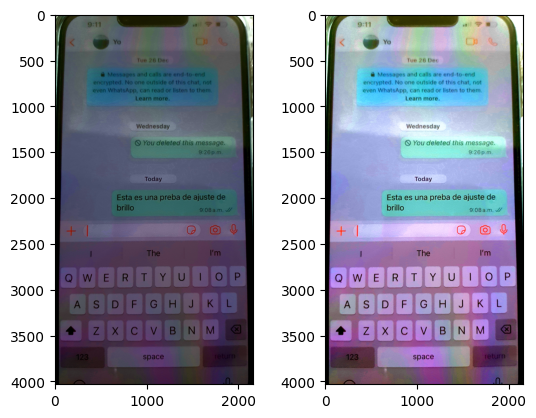

In [6]:
# code exercise 1C
brightness_img = cv2.addWeighted(np.zeros(img.shape, img.dtype), 0, contrast_img, 2, 0)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(contrast_img)
axarr[1].imshow(brightness_img)


# **Ejercicio 2. Aplicacion Negativo**



**Soldadura Industrial**

En el sector industrial, la construcción y reparación de infraestructura de metal o acero, que debe soportar altas temperaturas, presión o carga. Debe asegurarse que las soldaduras se apliquen correctamente. Existe un método para analizar si estas han sido aplicadas correctamente o han sufrido algún defecto. Aunque ya existen métodos como la tinta penetrante. Sin embargo, los rayos X son una manera más efectiva de analizarlas.

Los resultados, en este caso, las radiografías, deben de ser analizadas y en algunos casos, mejorar las imágenes, como a continuación se realiza:

**Observacion de la imagen original y aplicacion del histograma**

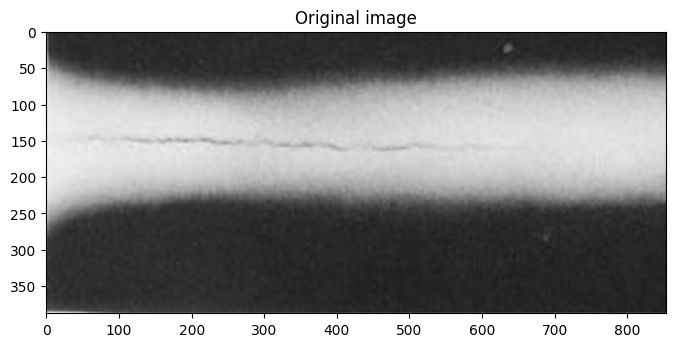

(0.0, 256.0)

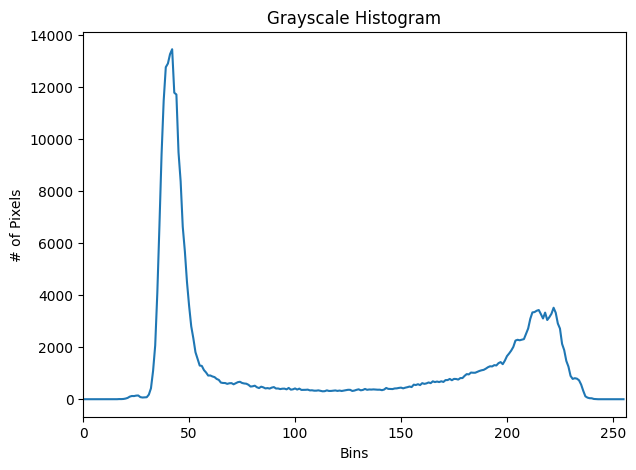

In [7]:
#Leemos el imagen desde la carpeta
img_GS = cv2.imread("Images/GrietaSoldadura.png", 0)

#Ajuste de tamaño
figsize = (8, 5)
plt.figure(figsize=figsize)
#Mostramos la imagen en escala de grises: cmap="gray"
plt.imshow(img_GS, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

#Se calcula el histograma de la imagen
hist_GS = cv2.calcHist([img_GS],[0],None,[256],[0,256])

#Graficamos el Histograma
#Ajuste de tamaño
figsize = (7, 5)
plt.figure(figsize=figsize)
#Asignamos Etiquetas
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
#Mostramos la grafica
plt.plot(hist_GS)
plt.xlim([0, 256])

**Se aplica la equalizacion de histograma a la imagen**

In [8]:
#Aplicamos ecualizacion de histograma a la Imagen
eq_GS = cv2.equalizeHist(img_GS)

#Se calcula el histograma de la imagen
hist_GS_2 = cv2.calcHist([eq_GS],[0],None,[256],[0,256])

A continuacion, se observara la imagen mejorada, se puede ver que resaltan los detalles, como la grieta en medio del cordon de soldadura.

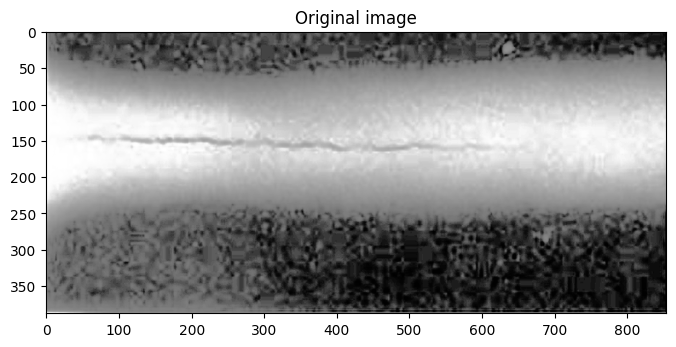

(0.0, 256.0)

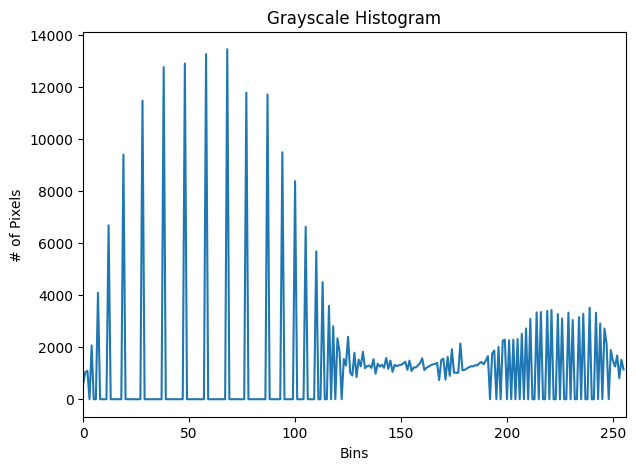

In [9]:
#Ajuste de tamaño
figsize = (8, 5)
plt.figure(figsize=figsize)
#Mostramos la imagen en escala de grises: cmap="gray"
plt.imshow(eq_GS, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

#Graficamos el Histograma
#Ajuste de tamaño
figsize = (7, 5)
plt.figure(figsize=figsize)
#Asignamos Etiquetas
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
#Graficamos el Histograma
plt.plot(hist_GS_2)
plt.xlim([0, 256])

Fuente [4][5]

# **Ejercicio 3. Gamma**


**Explicacion:**

La función Gamma es muy utilizada para poder corregir imágenes respecto a su brillo y contraste.

Originalmente fue implementada debido a las limitantes de los monitores CRT en que la señal de entrada no podía ser amplificada analógicamente.

La fórmula gamma es la siguiente:

$$ O = {I \over 255 } ^ {1 \over \gamma} * 255 $$



Donde: \
I - pixel de entrada[0, 255]. \
O - pixel de salida [0, 255]. \
γ - valor que controla el brillo. Si gamma < 1 entonces la imagen será más oscura, si gamma > 1 entonces será más clara. Un valor de gamma = 1 no afectará la imagen. \

En la función gamma, el pixe es convertido de un rango de [0,255] a [0.0,1.0]; después de los cálculos es devuelto al rando de [0,255].

Por tal motivo se utiliza la función lut (Lookup Table - LUT), lo cual implica una reducción en los tiempos de cálculo.


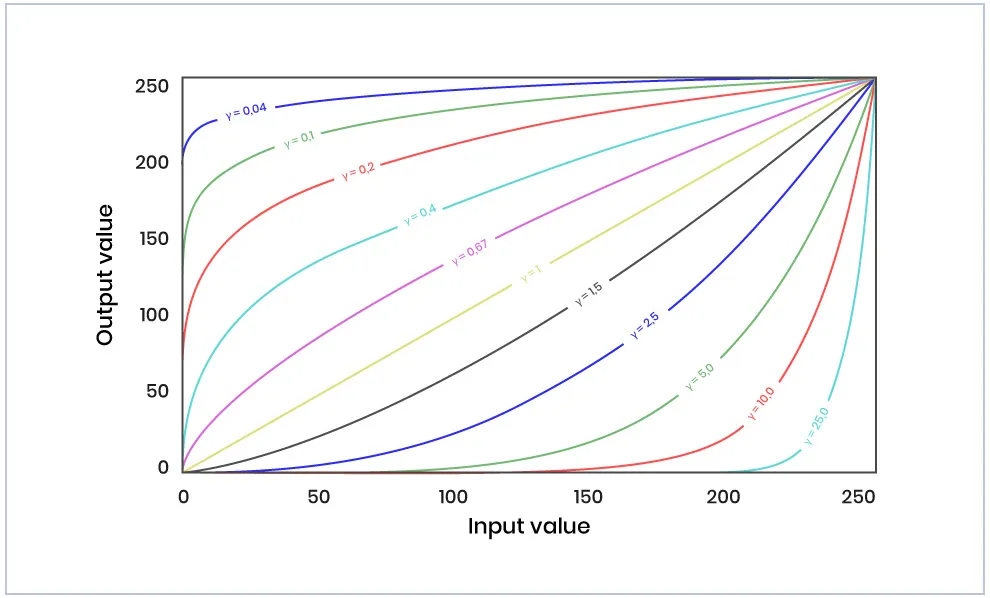

In [10]:
# Función Gamma

def gammaCorrection(src, gamma):
    invGamma = 1/gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

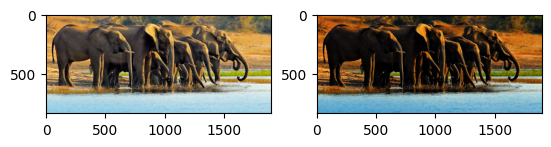

In [11]:
img = cv2.imread('Images/original1.jpg')

correccion = 0.5
gammaImg = gammaCorrection(img, correccion)

#salvamos la imagen corregida
cv2.imwrite('Images/gamma1.jpg',gammaImg)

#para poder visualizar en orden RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gammaImg_rgb = cv2.cvtColor(gammaImg, cv2.COLOR_BGR2RGB)

#muestra resultados
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rgb)
axarr[1].imshow(gammaImg_rgb)

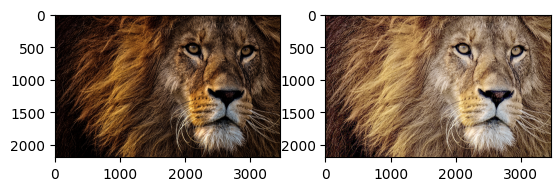

In [12]:
img = cv2.imread('Images/original2.jpg')

correccion = 2.2
gammaImg = gammaCorrection(img, correccion)

#salvamos la imagen corregida
cv2.imwrite('Images/gamma2.jpg',gammaImg)

#para poder visualizar en orden RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gammaImg_rgb = cv2.cvtColor(gammaImg, cv2.COLOR_BGR2RGB)

#muestra resultados
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rgb)
axarr[1].imshow(gammaImg_rgb)

# **Ejercicio 4. Sustraccion de imagenes**



Una forma de mitigar un efecto de iluminación disparejo en una imagen es realizando resta de imágenes, en este caso podemos aplicar la resta con una imagen cuya variación de la iluminación es similar a la imagen original.

Al Aplicar la operación la imagen resultante tendra pixels más obscuros en la región donde el fondo es más brillante, podemos ajustar la imagen sumando una constante para corregir el brillo.

Source: https://www.allaboutcircuits.com/technical-articles/arithmetic-operations-on-images-image-addition-averaging-and-subtraction/

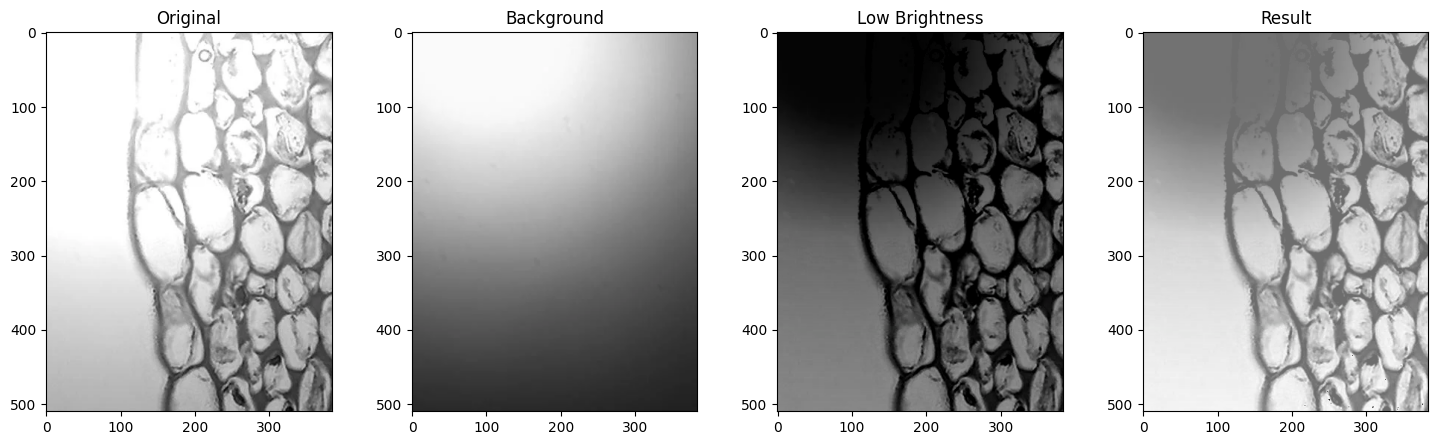

In [13]:
image1 = cv2.imread('Images/image1.bmp')
image2 = cv2.imread('Images/image2.bmp')

image3 = cv2.subtract(image1, image2)

image4 = image3 + 109

images = [image1, image2, image3, image4]
labels = ['Original', 'Background', 'Low Brightness', 'Result']

fig, axes = plt.subplots(1, 4, figsize=(15,9))
fig.tight_layout(pad=2.7)

axes = axes.ravel()

for i in range(4):
    axes[i].set_title(labels[i])
    axes[i].imshow(images[i])

# **Bibliografias:**



[1] OpenCV: Arithmetic Operations on Images. (n.d.). Recuperado enero 20, 2024, de https://docs.opencv.org/4.9.0/d0/d86/tutorial_py_image_arithmetics.html


[2] Histogram Equalization in Python. Rahman, (2023, julio 28). Recuperado enero 20, 2024, de https://code.tutsplus.com/histogram-equalization-in-python--cms-30202t

[3] Python Image Processing Tutorial (Using OpenCV). Ebrahim, (2023, julio 5). Recuperado enero 20, 2024, de https://likegeeks.com/python-image-processing/

[4] Welding defect detection based on localimage enhancement. (Zhang Lin, Zhang Yingjie, Dai Bochao, Chen Bo, Li Yangfan), (IET Image Processing, Volume 13, Issue 13, Nov 2019, Pages 2367-2658) https://ietresearch.onlinelibrary.wiley.com/doi/epdf/10.1049/iet-ipr.2018.5840

[5] A state-of-the-art survey of welding radiographic image analysis: Challenges, technologies and applications. (Liu, Tianyuan. Zheng, Pai.
Bao, Jinsong. Chen, Huabin), (Elsevier Ltd, 15 June 2023). https://www.sciencedirect.com/science/article/abs/pii/S0263224123003858

[6] Intro to Image Processing in OpenCV with Python. Bergmark, (2018, octubre 2). Recuperado enero 20, 2024, de https://medium.com/@pontus.bergmark/intro-to-image-processing-in-opencv-with-python-1c7f94af18a7

[7] How to Use Gamma Correction for Image Processing with Opencv (2015, noviembre 9). Recuperado enero 20, 2024, de https://www.dynamsoft.com/codepool/image-processing-opencv-gamma-correction.html